# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


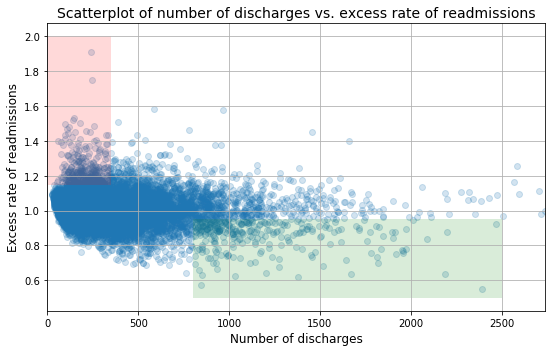

In [8]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

#### A. Do you agree with the above analysis and recommendations? Why or why not?

It's difficult to approve the initial observations written above based on the plot because there is not numerical evaluation calculated to confirm them, no correlation coefficient and moreover, it's not clear why the boundaries of the shaded regions are chosen with those values.

##### Statistics
- In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
- In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

To verify the statistics assessments we need to do some evaluations:

In [29]:
df_100  = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] < 100 ]
df_1000 = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] > 1000]

mean_rate_100  = df_100 ['Excess Readmission Ratio'].mean()
mean_rate_1000 = df_1000['Excess Readmission Ratio'].mean()

num_100  = df_100.loc[df_100['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'].count()
num_1000 = df_1000.loc[df_1000['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'].count()

tot_100  = df_100['Excess Readmission Ratio'].count()
tot_1000 = df_1000['Excess Readmission Ratio'].count()

excess_rate_100  = (num_100  * 100.0) / tot_100
excess_rate_1000 = (num_1000 * 100.0) / tot_1000

print('In hospitals/facilities with number of discharges < 100, mean excess readmission rate is: ' + str(round(mean_rate_100,3))  + ' and ' + str(int(excess_rate_100)) + '% have excess readmission rate greater than 1.' )

print('In hospitals/facilities with number of discharges > 1000,  mean excess readmission rate is: ' + str(round(mean_rate_1000,3))+ ' and ' + str(int(excess_rate_1000)) + '% have excess readmission rate greater than 1.' )

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is: 1.023 and 63% have excess readmission rate greater than 1.
In hospitals/facilities with number of discharges > 1000,  mean excess readmission rate is: 0.978 and 44% have excess readmission rate greater than 1.


After the calculations, we can affirm that the statistics valuations are true.

##### Conclusions
- There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
- Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

We can quickly calculate the correlation between the number of discharges and readmission rates.

In [33]:
clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


The correlation is around -0.097, which is quite small and therefore, we can say that the conclusions are not true.

##### Regulatory policy recommendations
- Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
- Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.



Also here, there is not any analysis done to support the regulatory policy recommendations. And moreover, like above, the given numbers are chosen without any explanation.

#### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
- Setup an appropriate hypothesis test.
- Compute and report the observed significance value (or p-value).
- Report statistical significance for α = .01. 
- Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
- Look at the scatterplot above. 
- What are the advantages and disadvantages of using this plot to convey information?
- Construct another plot that conveys the same information in a more direct manner.

Our hypothesis are:
H0 = no excess readmissions (ratio < 1) and
H1 = excess readmissions (ratio > 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023FA1D301D0>]],
      dtype=object)

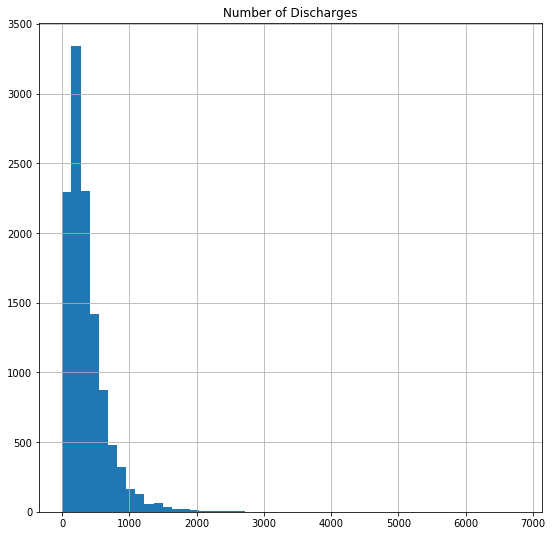

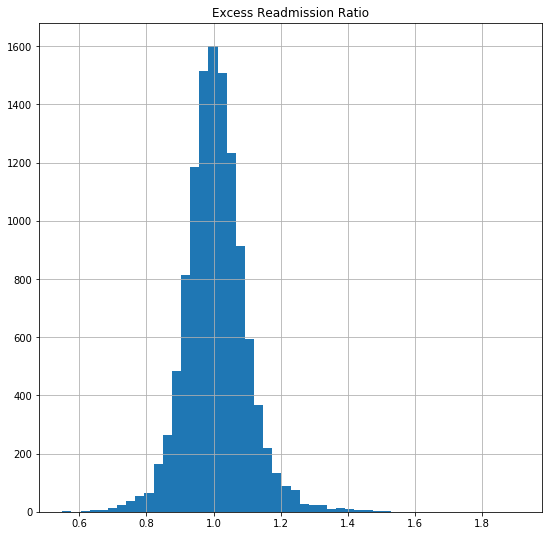

In [84]:
#Show data in histogram
import scipy.stats as stats
dataset = clean_hospital_read_df['Number of Discharges']
pd.DataFrame(dataset).hist(bins=50, figsize=(9,9))


dataset_ratio = clean_hospital_read_df['Excess Readmission Ratio'].dropna()
pd.DataFrame(dataset_ratio).hist(bins=50, figsize=(9,9))


In [69]:
import math
sample_size = 1000
sample = np.random.choice(a= dataset_ratio, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

er_stdev = dataset_ratio.std()  # Get the population standard deviation

margin_of_error = z_critical * (er_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.6448536269514722
Confidence interval:
(1.0074943935280787, 1.0170614064719212)


In [78]:
# conduct hypothesis test for pearson correlation coefficient
from scipy import stats

num_dis = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 0]['Number of Discharges']

readm_ratio = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 0]['Excess Readmission Ratio']

cor_coeff, p_val = stats.pearsonr(num_dis, readm_ratio)

print('correlation coefficient:',cor_coeff)
print('p value =',p_val)


correlation coefficient: -0.09739794351079353
p value = 1.222547377680967e-25


In [89]:
df_low  = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] < 100]
df_high = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] > 1000]

stats.ttest_ind(df_low['Excess Readmission Ratio'].dropna(), df_high['Excess Readmission Ratio'].dropna())

Ttest_indResult(statistic=10.060620398500793, pvalue=3.778753923341558e-23)

The calculated p-value is very small and so, we can say that the null hypothesis is not true. 


Here we have statistical signicance  because the p-value is 1.22 e-25 and is smaller than 0.01 (my significance level, α).
The practical significance is more subjective and it looks at whether the difference is large enough to be of value in a practical sense and here the correlation coefficient (r = -0.097) is considered very small and therefore, insignificant.

#### New plot
The scatter plot can be more efficient if we add a regression line which shows the relationship between the two variables and also the Pearson coefficient and the associated p-value that give a feeling for the strength of this relationship.

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


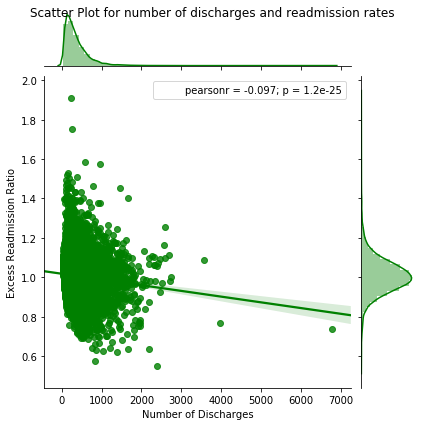

In [32]:
import seaborn as sns
sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data= clean_hospital_read_df, kind='reg', color='g')
plt.suptitle('Scatter Plot for number of discharges and readmission rates')
plt.show()